In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('./Datasets/data.csv')
df.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [3]:
df = df.drop(['Unnamed: 0'], axis=1)

In [4]:
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory

In [6]:
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [7]:
df.isnull().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [8]:
df.isnull().values.any()

False

In [9]:
df.shape

(2017, 16)

In [10]:
red_blue = ['#19B5FE', '#EF4836']
palette = sns.color_palette(red_blue)
sns.set_palette(palette)
sns.set_style('dark')

In [11]:
pos_tempo = df[df['target']==1]['tempo']
neg_tempo = df[df['target']==0]['tempo']
pos_danceability = df[df['target']==1]['danceability']
neg_danceability = df[df['target']==0]['danceability']
pos_duration = df[df['target']==1]['duration_ms']
neg_duration = df[df['target']==0]['duration_ms']
pos_energy = df[df['target']==1]['energy']
neg_energy = df[df['target']==0]['energy']
pos_loudness = df[df['target']==1]['loudness']
neg_loudness = df[df['target']==0]['loudness']
pos_acousticness = df[df['target']==1]['acousticness']
neg_acousticness = df[df['target']==0]['acousticness']
pos_liveness = df[df['target']==1]['liveness']
neg_liveness = df[df['target']==0]['liveness']
pos_key = df[df['target']==1]['key']
neg_key = df[df['target']==0]['key']
pos_valence = df[df['target']==1]['valence']
neg_valence = df[df['target']==0]['valence']
pos_instrumentalness = df[df['target']==1]['instrumentalness']
neg_instrumentalness = df[df['target']==0]['instrumentalness']

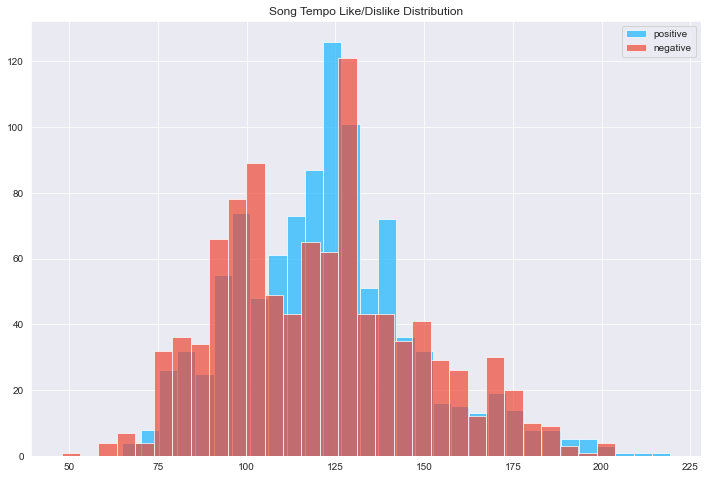

In [12]:
fig = plt.figure(figsize=(12, 8))
plt.title('Song Tempo Like/Dislike Distribution')
pos_tempo.hist(alpha=0.7, bins=30, label='positive')
neg_tempo.hist(alpha=0.7, bins=30, label='negative')
plt.legend(loc='upper right')

<AxesSubplot:title={'center':'Song Instrumentalness Like Distribution'}, xlabel='Instrumentalness', ylabel='Count'>

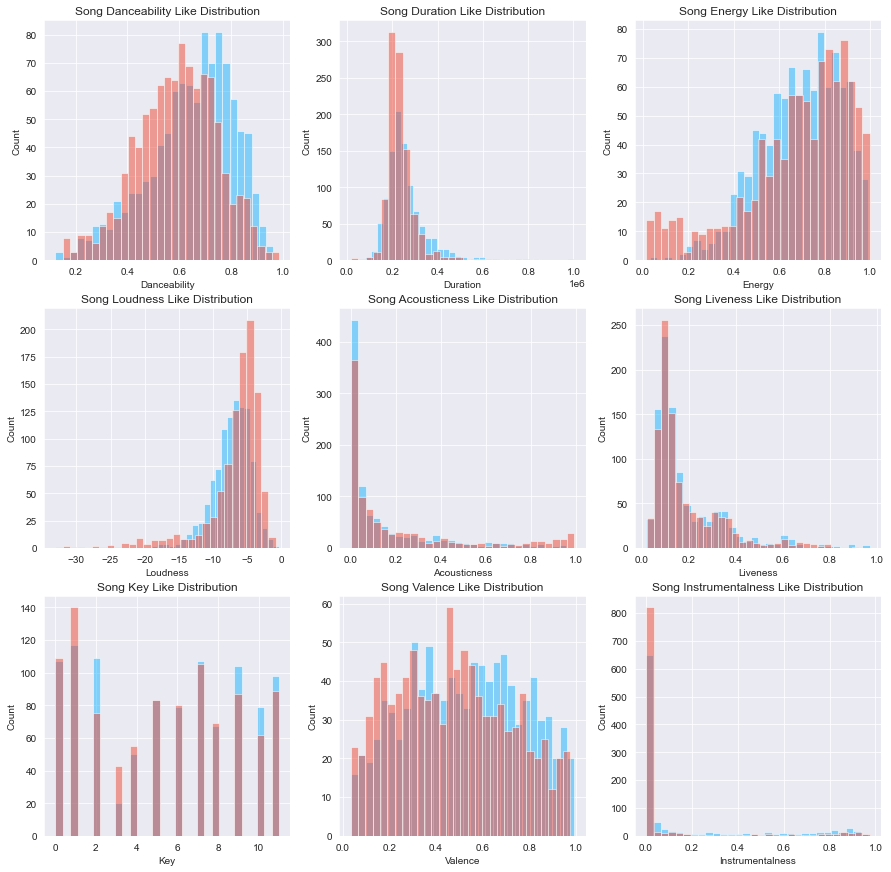

In [13]:
fig2 = plt.figure(figsize=(15,15))

# Danceability
ax3 = fig2.add_subplot(331)
ax3.set_xlabel('Danceability')
ax3.set_ylabel('Count')
ax3.set_title('Song Danceability Like Distribution')
pos_danceability.hist(alpha=0.5, bins=30)
ax4 = fig2.add_subplot(331)
neg_danceability.hist(alpha=0.5, bins=30)

# Duration
ax5 = fig2.add_subplot(332)
ax5.set_xlabel('Duration')
ax5.set_ylabel('Count')
ax5.set_title('Song Duration Like Distribution')
pos_duration.hist(alpha=0.5, bins=30)
ax6 = fig2.add_subplot(332)
neg_duration.hist(alpha=0.5, bins=30)

# Energy
ax7 = fig2.add_subplot(333)
ax7.set_xlabel('Energy')
ax7.set_ylabel('Count')
ax7.set_title('Song Energy Like Distribution')
pos_energy.hist(alpha=0.5, bins=30)
ax8 = fig2.add_subplot(333)
neg_energy.hist(alpha=0.5, bins=30)

# Loudness
ax9 = fig2.add_subplot(334)
ax9.set_xlabel('Loudness')
ax9.set_ylabel('Count')
ax9.set_title('Song Loudness Like Distribution')
pos_loudness.hist(alpha=0.5, bins=30)
ax10 = fig2.add_subplot(334)
neg_loudness.hist(alpha=0.5, bins=30)

# Acousticness
ax11 = fig2.add_subplot(335)
ax11.set_xlabel('Acousticness')
ax11.set_ylabel('Count')
ax11.set_title('Song Acousticness Like Distribution')
pos_acousticness.hist(alpha=0.5, bins=30)
ax12 = fig2.add_subplot(335)
neg_acousticness.hist(alpha=0.5, bins=30)

# Liveness
ax13 = fig2.add_subplot(336)
ax13.set_xlabel('Liveness')
ax13.set_ylabel('Count')
ax13.set_title('Song Liveness Like Distribution')
pos_liveness.hist(alpha=0.5, bins=30)
ax14 = fig2.add_subplot(336)
neg_liveness.hist(alpha=0.5, bins=30)

# Key
ax15 = fig2.add_subplot(337)
ax15.set_xlabel('Key')
ax15.set_ylabel('Count')
ax15.set_title('Song Key Like Distribution')
pos_key.hist(alpha=0.5, bins=30)
ax16 = fig2.add_subplot(337)
neg_key.hist(alpha=0.5, bins=30)

# Valence
ax17 = fig2.add_subplot(338)
ax17.set_xlabel('Valence')
ax17.set_ylabel('Count')
ax17.set_title('Song Valence Like Distribution')
pos_valence.hist(alpha=0.5, bins=30)
ax18 = fig2.add_subplot(338)
neg_valence.hist(alpha=0.5, bins=30)

# Instrumentalness
ax19 = fig2.add_subplot(339)
ax19.set_xlabel('Instrumentalness')
ax19.set_ylabel('Count')
ax19.set_title('Song Instrumentalness Like Distribution')
pos_instrumentalness.hist(alpha=0.5, bins=30)
ax20 = fig2.add_subplot(339)
neg_instrumentalness.hist(alpha=0.5, bins=30)

<AxesSubplot:>

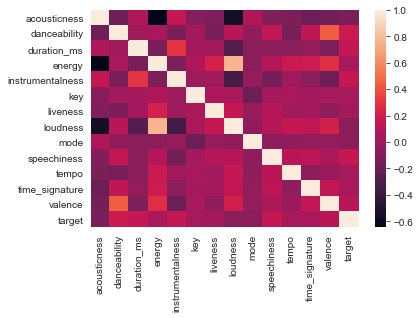

In [14]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [15]:
features = [
    'acousticness',
    'danceability',
    'duration_ms',
    'energy',
    'instrumentalness',
    'key',
    'liveness',
    'loudness',
    'tempo',
    'time_signature',
    'valence',
    'mode'
]

label = ['target']

In [16]:
X = df[features]
y = df[label]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1613, 12)
(1613, 1)
(404, 12)
(404, 1)


In [18]:
dtc = DecisionTreeClassifier(random_state=10)

dtc = dtc.fit(X_train,y_train)

y_pred = dtc.predict(X_test)

Now that the model has been fit, we can create predictions for the test set and see how they compare to the actual data. A sample of the predictions can be seen below.

In [19]:
result = pd.DataFrame({'actual':y_test['target'], 'predicted':y_pred})
result[result['actual']==1]

,actual,predicted
351,1,0
703,1,1
120,1,1
169,1,1
634,1,1
...,...,...
165,1,0
535,1,1
49,1,0
866,1,1


#### The accuracy of the Model

In [20]:
print(metrics.classification_report(y_test, y_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print('AUC:', metrics.auc(fpr, tpr))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73       205
           1       0.72      0.68      0.70       199

    accuracy                           0.71       404
   macro avg       0.71      0.71      0.71       404
weighted avg       0.71      0.71      0.71       404

AUC: 0.7123667116068145


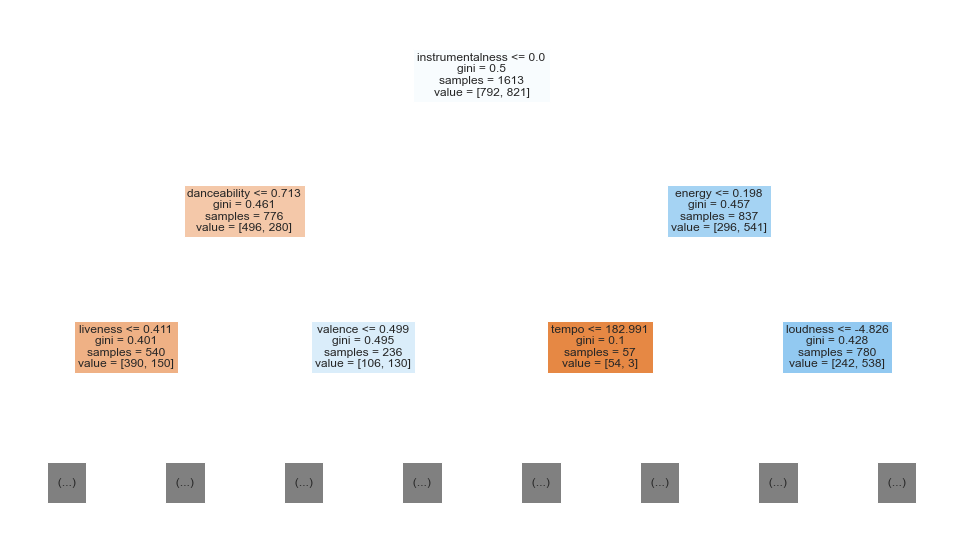

In [21]:
fig = plt.figure(figsize=(17,10))
_ = plot_tree(dtc, max_depth=2, feature_names=list(X_train.columns), filled=True, fontsize=12)

#### Features importance

In [23]:
fi = pd.DataFrame({'features':X_train.columns,'importance':dtc.feature_importances_}).sort_values(by=['importance'], ascending=False)
fi

,features,importance
4,instrumentalness,0.155194
2,duration_ms,0.130753
3,energy,0.129425
7,loudness,0.116099
10,valence,0.113294
0,acousticness,0.088694
8,tempo,0.080852
1,danceability,0.077722
6,liveness,0.066740
5,key,0.024792


<AxesSubplot:xlabel='importance', ylabel='features'>

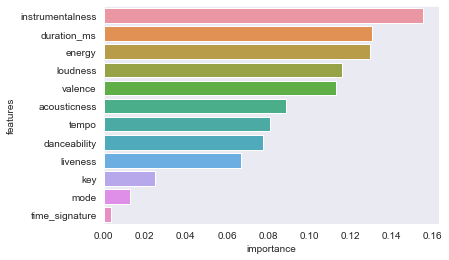

In [24]:
sns.barplot(x="importance", y="features", data=fi)

In [25]:
import joblib
filename = 'model.pkl'
joblib.dump(dtc, filename)

['model.pkl']